# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Mexico City, Mexico City, Mexico**, or **Mexico** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Mexico City, Mexico City, Mexico** to Ann Arbor, USA. In that case at least one source file must be about **Mexico City, Mexico City, Mexico**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Mexico City, Mexico City, Mexico** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

#### 1 Region and Domain

Mexico City, Jalisco, Nuevo Leon; Mexico

Economic activity or measures



#### 2 Research Question

How productive in the manufacturing area has Mexico City being compare to the other two biggest representative states in Mexico (Jalisco and Nuevo Leon) over the last few years?  


#### 3 Links

• https://www.inegi.org.mx/app/tabulados/pxwebv2/pxweb/es/EMIM/EMIM/EMIM_ENTIDAD_09.px/

• https://www.inegi.org.mx/app/tabulados/pxwebv2/pxweb/es/EMIM/EMIM/EMIM_ENTIDAD_14.px/

• https://www.inegi.org.mx/app/tabulados/pxwebv2/pxweb/es/EMIM/EMIM/EMIM_ENTIDAD_19.px/

#### 4 Code and image

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


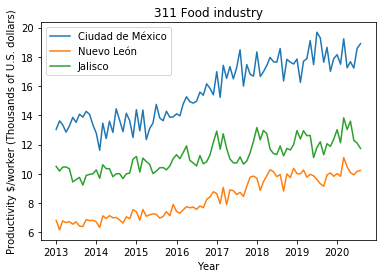

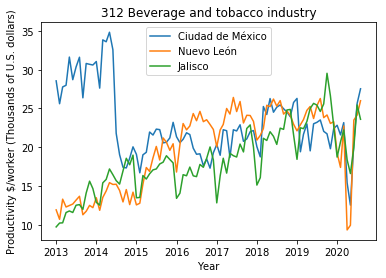

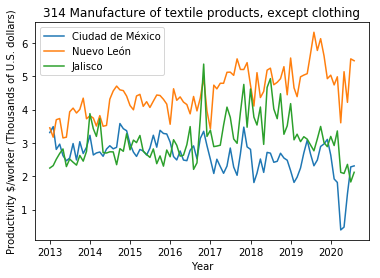

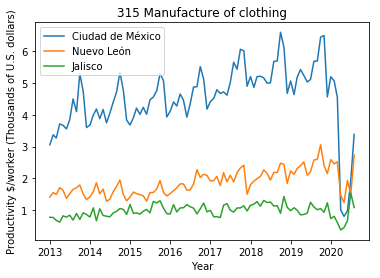

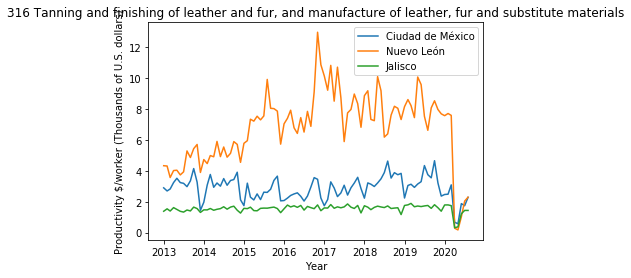

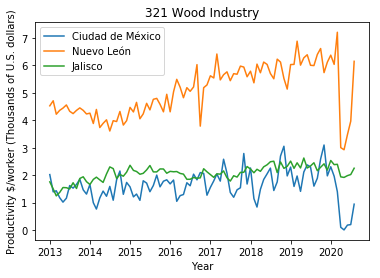

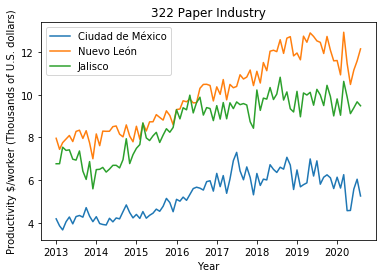

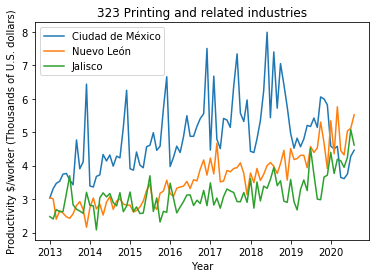

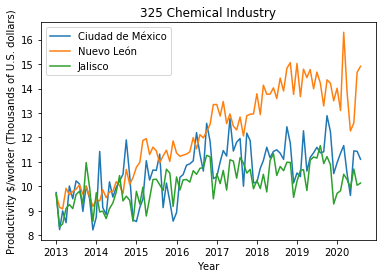

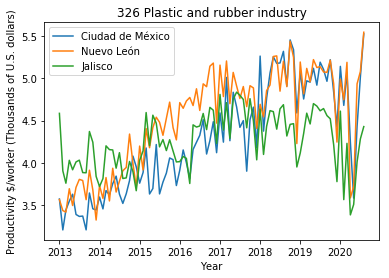

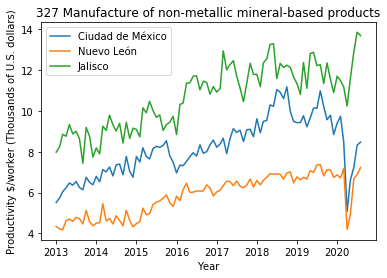

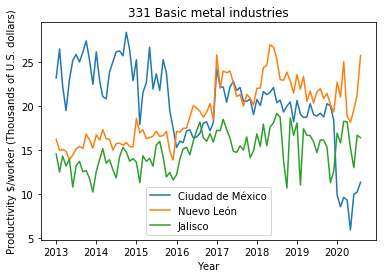

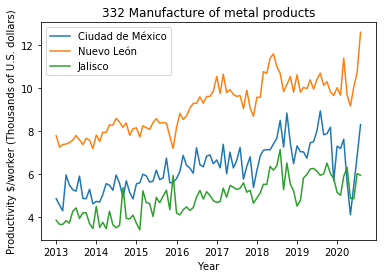

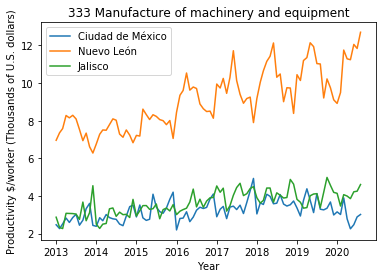

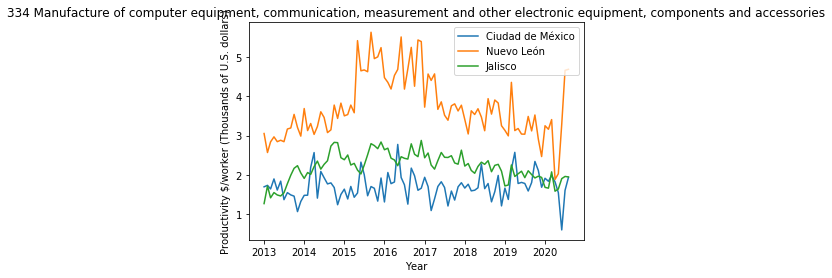

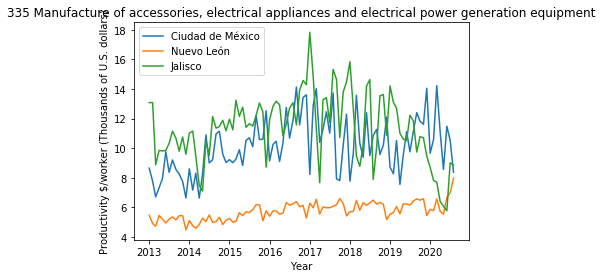

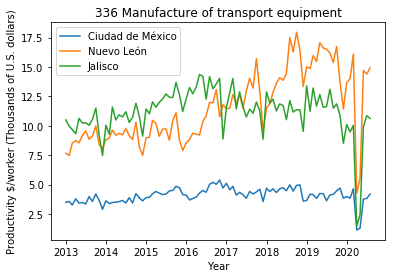

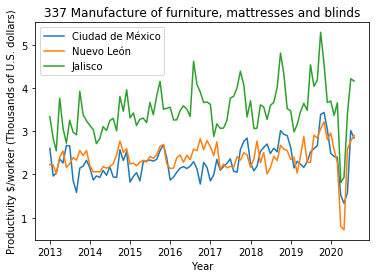

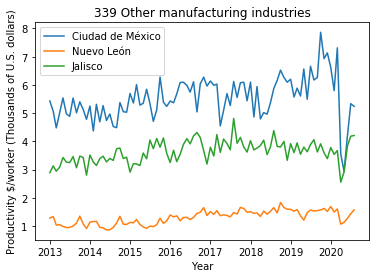

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

def getplot(table, i):
    ndf = table[table['Industry']==industry[i]]
    del ndf['Industry']
    ndf['Value'] = ndf['Value']/20.59
    
    
    #CDMX
    df1 = ndf[ndf['State']==state[0]]
    x1 = df1['Date'].tolist()
    y1 = df1['Value'].tolist()
    plt.plot(x1, y1, label = state[0])
    #NL
    df2 = ndf[ndf['State']==state[1]]
    x2 = df2['Date'].tolist()
    y2 = df2['Value'].tolist()
    plt.plot(x2, y2, label = state[1])
    #Jalisco
    df3 = ndf[ndf['State']==state[2]]
    x3 = df3['Date'].tolist()
    y3 = df3['Value'].tolist()
    plt.plot(x3, y3, label = state[2])
    
    plt.xlabel('Year')
    plt.ylabel('Productivity $/worker (Thousands of U.S. dollars)')
    plt.title(industryeng[i])
    plt.legend()
    return plt.show()


dfcdmx = pd.read_excel (r'EMIM_9 CDMX.xlsx', skiprows=3)
dfnl = pd.read_excel (r'EMIM_19 Nuevo Leon.xlsx', skiprows=3)
dfj = pd.read_excel (r'EMIM_14 Jalisco.xlsx', skiprows=3)

frames = [dfcdmx, dfnl, dfj]

merge = pd.concat(frames)

del merge['Unnamed: 2']

#Columns data
state = ['Ciudad de México', 'Nuevo León', 'Jalisco' ]
industry = merge['Unnamed: 3'].tolist()
industry = list(dict.fromkeys(industry))
metric = ['-Personal ocupado total (Número de personas)','-Valor de producción de los productos elaborados (Miles de pesos corrientes)']
year = merge['Unnamed: 4'].tolist()
year = list(dict.fromkeys(year))

#df filter
df = pd.DataFrame(columns=['Metric', 'State', 'Year', 'Industry', 'January','February','March','April',
                          'May','June','July','August','September','October','November','December'])

for index, row in merge.iterrows():
    if row['Unnamed: 0'] in metric:
        x = {'Metric':row['Unnamed: 0'] ,'State':row['Unnamed: 1'] , 'Year':row['Unnamed: 4'] ,'Industry':row['Unnamed: 3'],'January':row['Enero'],
            'February':row['Febrero'],'March':row['Marzo'],'April':row['Abril'],'May':row['Mayo'],
            'June':row['Junio'],'July':row['Julio'],'August':row['Agosto'],'September':row['Septiembre'],
            'October':row['Octubre'],'November':row['Noviembre'],'December':row['Diciembre']}
        df = df.append(x, ignore_index=True)
     
df = df.sort_values(by=['State', 'Year', 'Industry'])

#df of production
production = pd.DataFrame(columns=['State', 'Date', 'Industry', 'Value'])

months = [1,2,3,4,5,6,7,8,9,10,11,12]

for index, row in df.iterrows():
    if row['Metric'] == '-Personal ocupado total (Número de personas)':
        y = [row['January'], row['February'], row['March'],row['April'], row['May'],row['June'],
             row['July'],row['August'],row['September'],row['October'],row['November'],row['December']]
    if row['Metric'] == '-Valor de producción de los productos elaborados (Miles de pesos corrientes)':
        w = [row['January'], row['February'], row['March'],row['April'], row['May'],row['June'],
             row['July'],row['August'],row['September'],row['October'],row['November'],row['December']]
        div = [i / j for i, j in zip(w, y)]
        for q in range(12):     
            z = {'State':row['State'], 'Date':datetime.date(int(row['Year']), months[q], 1), 
                 'Industry':row['Industry'],'Value':div[q]}
            production = production.append(z, ignore_index=True)
        

industryeng = ['311 Food industry',
               '312 Beverage and tobacco industry',
               '314 Manufacture of textile products, except clothing',
               '315 Manufacture of clothing',
               '316 Tanning and finishing of leather and fur, and manufacture of leather, fur and substitute materials',
               '321 Wood Industry',
               '322 Paper Industry',
               '323 Printing and related industries',
               '325 Chemical Industry',
               '326 Plastic and rubber industry',
               '327 Manufacture of non-metallic mineral-based products',
               '331 Basic metal industries',
               '332 Manufacture of metal products',
               '333 Manufacture of machinery and equipment',
               '334 Manufacture of computer equipment, communication, measurement and other electronic equipment, components and accessories',
               '335 Manufacture of accessories, electrical appliances and electrical power generation equipment',
               '336 Manufacture of transport equipment',
               '337 Manufacture of furniture, mattresses and blinds',
               '339 Other manufacturing industries'] 

for x in range(19):
    getplot(production, x)
    
    



#### 5 Discussion

You must contribute a short (1-2 paragraph) written justification of how your visualization
addresses your stated research question

I found the manufacturing data and its branches in the portal of the national Institute of geograhpy and statistics of Mexico (INEGI). In this exercise the productivity will be represented by dividing the total value of production in Thousands of U.S. dollars (January 29 2021 value) between the total workforce in each month, this will give us the rate of how much value does one single worker on average produces in each month from January 2013 to August 2020.

To give some context chose to compare Mexico City to Jalisco and Nuevo Leon since these two cities are representative of Mexico in very different ways. Nuevo Leon is an industrial city near the border with US, it has a thriving economy and it is well known by its metallurgical industry and its derivatives. Jalisco on the other part is the birthplace of many Mexican traditions such as mariachi, tequila, charreria and several other things. 


The first eye drawing detail in almost all the industry plots is the critic drop in production in 2020 when COVID hit Mexico all around. The industries that had a drop in production during this period did not adapt the total work force use which means that in those industries the work force was not fired to adjust to the new demand. On the other hand, the industries that had a drop in production but swiftly recover it production rate was because they opted to fire their labor force to adapt to the new demand.

Regarding the set question Mexico City has a significant productivity advantage in the food, clothiong manufacturing, printingand other industries. Nuevo Leon has a clear advantage in productivity in almost al the other manufacturing branches, this is to the industrial nature of this state and the commercial advantage it has by being next to the U.S.